In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/P_Proyecto _Final/Final

/content/drive/My Drive/P_Proyecto _Final/Final


In [3]:
!ls

cnn_utils.py  datasets	Final_CNN.ipynb  pq  Pro.ipynb	__pycache__


In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
#from cnn_utils import *
from cnn_utils import load_dataset
from cnn_utils import random_mini_batches
from cnn_utils import convert_to_one_hot
from cnn_utils import forward_propagation_for_predict
from cnn_utils import predict

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()      # Cargar la base de datos

y = 3


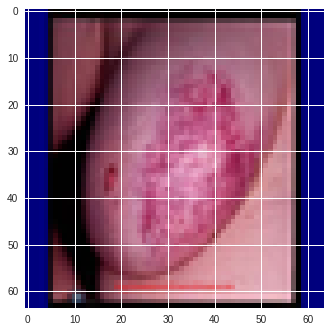

In [5]:
# Visualizar unos de los ejemplos de la base de datos

index = 6
plt.figure(1)
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

y = 1


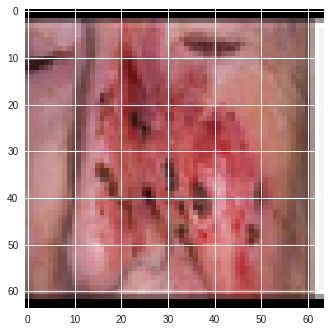

In [6]:
index = 150
plt.figure(1)
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [7]:

# imprimir características de la base de datos
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("Número de ejemplos de entrenamiento: " + str(X_train.shape[0]))
print ("Número de ejemplos de testing: " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

Número de ejemplos de entrenamiento: 26539
Número de ejemplos de testing: 6635
X_train shape: (26539, 64, 64, 3)
Y_train shape: (26539, 6)
X_test shape: (6635, 64, 64, 3)
Y_test shape: (6635, 6)


In [0]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Crea los placeholders para la sesión.
    
    Argumentos:
    n_H0 -- Escalar, height de la imagen de entrada
    n_W0 -- Escalar, width de la imagen de entrada
    n_C0 -- Escalar, Número de canales de entrada
    n_y -- Escalar, Número de clases
        
    Returna:
    X -- placeholder para los datos de entrada, de tamaño [None, n_H0, n_W0, n_C0] y dtype "float"
    Y -- placeholder para las etiquetas de entrada, de tamaño [None, n_y] y dtype "float"
    """

    #### Haga su código áca ### (≈2 lines)  usar tf.placeholder

    X = tf.placeholder(tf.float32,shape=(None,n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32,shape=(None,n_y))
    
    ### Fin ###
    
    return X, Y

In [9]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [0]:
def initialize_parameters():
    """
    Inicializa los parámetros (Pesos) para construir la red neuronal convolucional con tensorflow. El tamaño es
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returna:
    parameters -- Un diccionario de tensores que contiene W1, W2
    """
    
    tf.set_random_seed(1)                              # 
        
    #### Haga su código áca ### (≈2 lines) usar tf.get_variable("W1", [4, 4, 3, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
#los dos primeros cuatros son el filtro de tres canales
    W1 = tf.get_variable('w1',[4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('w2',[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    
    ### Fin ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [11]:
tf.reset_default_graph()

with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


In [0]:
def forward_propagation(X, parameters):
    """
    Implementa la propagación hacia adelante del modelo

    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Argumentos:
    X -- placeholder de entrada (ejemplos de entrenamiento), de tamaño (input size, number of examples)
    parameters -- Diccionario que contiene los parámetros "W1", "W2" desde initialize_parameters

    Returna:
    Z3 -- Salida de la última unidad LINEAR 
    """
    
    # Obtención de los pesos desde "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    #### Haga su código áca ### 
    
    # CONV2D: stride of 1, padding 'SAME'
    
    Z1 =tf.nn.conv2d(X,W1,strides = [1,1,1,1],padding="SAME") 
    
    # RELU
    
    A1 = tf.nn.relu(Z1)  #
    
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    
    P1 = tf.nn.max_pool(A1,ksize=[1,8,8,1] ,strides= [1,8,8,1],padding='SAME')
    
    # CONV2D: filters W2, stride 1, padding 'SAME'
    
    Z2 = tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='SAME')
    
    # RELU
    
    A2 = tf.nn.relu(Z2)
    
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1],strides =[1,4,4,1],padding='SAME')
    
    # FLATTEN
    
    F = tf.contrib.layers.flatten(P2)
    
#    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
#    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    
    Z3 = tf.contrib.layers.fully_connected(F,6,None)
    
    ### Fin ###

    return Z3

In [15]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))
    print("Z3 = " + str(Z3.shape))

Instructions for updating:
Use keras.layers.flatten instead.
Z3 = [[ 1.4416983  -0.24909672  5.4504995  -0.26189643 -0.20669863  1.3654673 ]
 [ 1.407085   -0.02573237  5.08928    -0.48669893 -0.40940693  1.2624853 ]]
Z3 = (?, 6)


In [0]:
def compute_cost(Z3, Y):
    """
    Calcula la función de costo
    
    Argumentos:
    Z3 -- Salida del forward propagation (Salida de la última unidad LINEAR), ode tamaño (6, Número de ejemplos)
    Y -- placeholders con el vector de etiquetas "true", del mismo tamaño que Z3

    Returns:
    cost - Tensor de la función de costo
    """
    
    #### Haga su código áca ### (≈2 lines)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    
    ### Fin ###
    
    return cost   

In [17]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 4.6648707


Cost after epoch 0: 0.858208
Cost after epoch 5: 0.053974
Cost after epoch 10: 0.016214
Cost after epoch 15: 0.006212
Cost after epoch 20: 0.002268
Cost after epoch 25: 0.000875
Cost after epoch 30: 0.000331
Cost after epoch 35: 0.000204
Cost after epoch 40: 0.000110
Cost after epoch 45: 0.000048
Cost after epoch 50: 0.000019
Cost after epoch 55: 0.000022
Cost after epoch 60: 0.000015
Cost after epoch 65: 0.000010
Cost after epoch 70: 0.000008
Cost after epoch 75: 0.000005
Cost after epoch 80: 0.000003
Cost after epoch 85: 0.000009
Cost after epoch 90: 0.000005
Cost after epoch 95: 0.000003


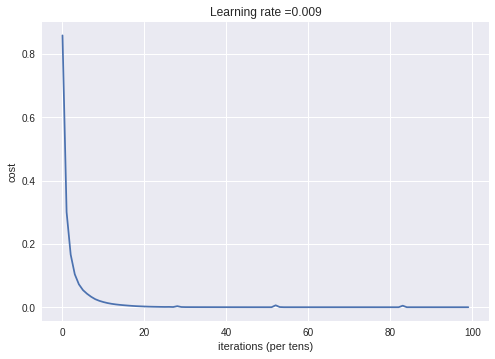

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 1.0
Test Accuracy: 1.0


In [18]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009, num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Implementa una Red Neuronal Convolucional de 3-Capas en Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Argumentos:
    X_train -- Conjunto de entrenamiento, de tamaño (None, 64, 64, 3)
    Y_train -- Etiquetas del conjunto de entrenamiento, de tamaño (None, n_y = 6)
    X_test -- Conjunto de datos de Test, de tamaño (None, 64, 64, 3)
    Y_test -- Etiquetas del conjunto de Test, de tamaño  (None, n_y = 6)
    learning_rate -- factor de aprendizaje en la optimización
    num_epochs -- Número de epocas en el ciclo de optimización
    minibatch_size -- Tamaño del minibatch
    print_cost -- True: imprime el costo cada 100 epocas
    
    Returna:
    train_accuracy -- Número Real, Accuracy del conjunto de entrenamiento (X_train)
    test_accuracy -- Número Real, Accuracy del conjunto de Test(X_test)
    parameters -- parameters aprendidos por el modelo. Estos pueden ser usados para predecir.
    """
    
    ops.reset_default_graph()                         # Permite correr nuevamente el modelo sin sobreescribir las tf variables
    tf.set_random_seed(1)                             #  (tensorflow seed)
    seed = 3                                          # 
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # Para almacenar el costo
    
    # Crear los PlaceHolders
          
    X, Y = create_placeholders(n_H0, n_W0, n_C0,n_y)
    
    # Inicializar Parámetros
    
    parameters = initialize_parameters()
    
    # Forward propagation: Construir el forward propagation en el grafo de tensorflow
    
    Z3 = forward_propagation(X, parameters)
        
    # Cost function: Incluir la  función de costo en el grafo de tensorflow
#        cuanto se demoro la red en prededir
    cost = compute_cost(Z3,Y)
    
    # Backpropagation: Define el optimizador. Usar AdamOptimizer para minimizar el costo.

    optimizer = tf.train.AdamOptimizer().minimize(cost)  
    
    # Inicializar todas las variables globales
    
    init = tf.global_variables_initializer()
     
    # Iniciar la sesión 
    with tf.Session() as sess:
        
        # Run init
        sess.run(init)
        
        # Loop de entrenamiento
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # número de minibatches de tamaño minibatch_size en el conjunto de entrenamiento          seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Seleccionar un minibatch

                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).

                _ , temp_cost = sess.run([optimizer, cost], {X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
                
            # Imprime el costo
            
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)  
                
# Graficar la función de costo
        plt.figure(2)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()       
        
# Calcular las predicciones correctas
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1)) 
    
 # Calcular la predicción sobre el conjunto de test 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters
    
_, _, parameters = model(X_train, Y_train, X_test, Y_test)    